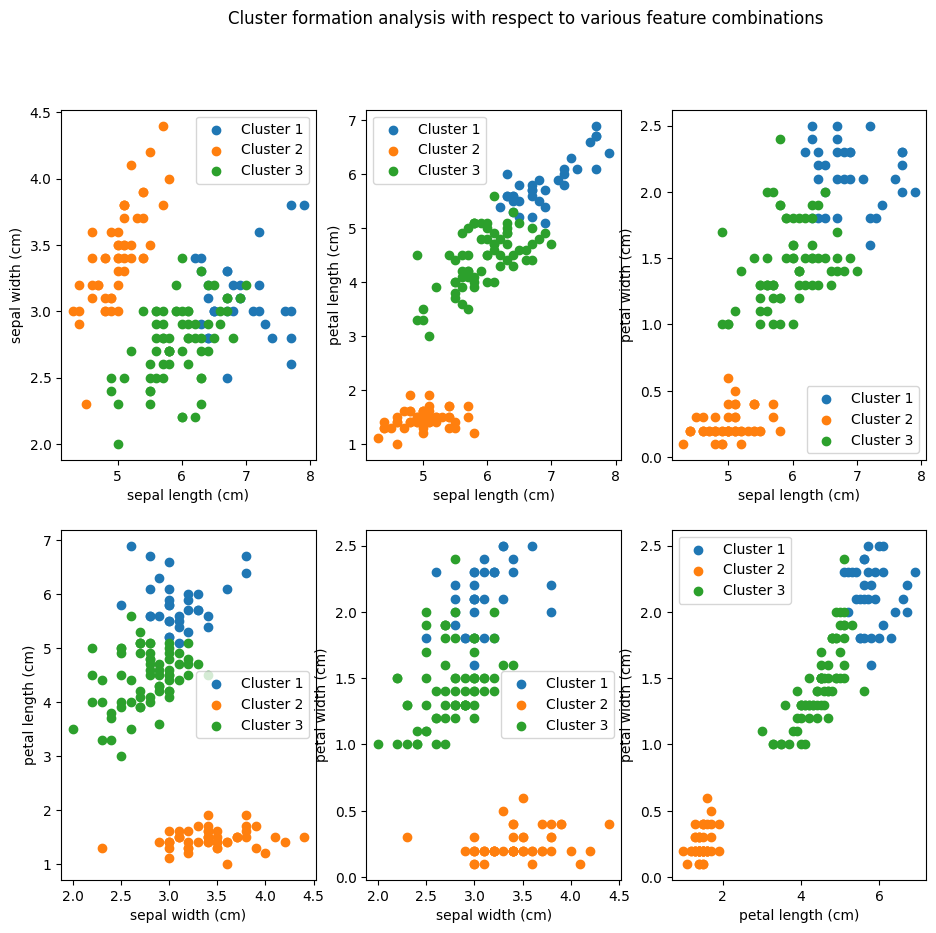

In [3]:
# Assignment 1: k-means clustering on iris dataset and cluster visualisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from itertools import combinations
import matplotlib

iris = load_iris()

# define the number of clusters to be made
k = 3

# taking the iris dataset as a numpy array
points_arr = np.array(iris.data)

# creating k random centroids, each having shape as (k, len(iris.feature_names))
# out of np.rand, np.randn, np.randint (on [min, max) of iris data array), drawing out random samples from uniform distribution
# and scaling them to [min, max) of iris data array produces the best results for the clusters
centroids = (np.max(points_arr) - np.min(points_arr)) * np.random.random_sample((k, len(iris.feature_names))) + np.min(points_arr)

# implement k-means clustering algorithm
def kmeans(points_arr, centroids):
  new_centroids = np.zeros(centroids.shape)
  clusters = []
  while(1):
    dist = np.zeros((points_arr.shape[0],k))
    for i in range(k):
      dist[:,i] = np.sqrt(np.sum((points_arr - centroids[i])**2,axis = -1))
    min_idx = np.argmin(dist, axis = -1)
    clusters = list(min_idx)
    for cluster in clusters:
      new_centroids[cluster] = np.mean(points_arr[min_idx == cluster], axis = 0)
    if np.all(new_centroids == centroids):
      break
    centroids = new_centroids
  return clusters, centroids

# get the clusters using k means algorithm
labels, centroids = kmeans(points_arr, centroids)

# get the feature names, with different pair combinations
feature_names, feature_idx = combinations(list(iris.feature_names), r = 2), combinations(list(range(points_arr.shape[1])), r = 2)
feature_combinations, feature_idx_combinations = [], []
for i in feature_names:
  feature_combinations.append(i)
for j in feature_idx:
  feature_idx_combinations.append(j)

len_combinations = len(feature_idx_combinations)

fig, ax = plt.subplots(2,len_combinations//2, figsize = (10, 10)) # for 6 pair combinations
plt.subplots_adjust(left = 0.035)

fig.suptitle("Cluster formation analysis with respect to various feature combinations")
f1, f2 = feature_combinations[0:len_combinations//2], feature_combinations[len_combinations//2:]
f3, f4 = feature_idx_combinations[0:len_combinations//2], feature_idx_combinations[len_combinations//2:]

color = np.random.randint(0,256,k)

for i in range(len(f1)):
  # plot scatter plot as per the centroid index as marker colour
  for label in set(labels):
    # iterate through unique label and create plot
    ax[0][i].scatter(points_arr[:, f3[i][0]][np.array(labels)==label],points_arr[:, f3[i][1]][np.array(labels)==label], label = "Cluster " + str(label+1))
  ax[0][i].set_xlabel(f1[i][0])
  ax[0][i].set_ylabel(f1[i][1])
  ax[0][i].legend()

for i in range(len(f2)):
  # plot scatter plot as per the centroid index as marker colour
  for label in set(labels):
    # iterate through unique label and create plot
    ax[1][i].scatter(points_arr[:, f4[i][0]][np.array(labels)==label],points_arr[:, f4[i][1]][np.array(labels)==label], label = "Cluster " + str(label+1))
  ax[1][i].set_xlabel(f2[i][0])
  ax[1][i].set_ylabel(f2[i][1])
  ax[1][i].legend()